## **PHÂN TÍCH CÁC NHÂN TỐ ẢNH HƯỞNG TỚI MỨC LƯƠNG CỦA CÁC VỊ TRÍ VIỆC LÀM TRÊN NỀN TẢNG TOPCV**

**Tổng quan Project:**
* Sử dụng thư viện **Python BeautifulSoup** trích xuất HTML các bài đăng tuyển dụng trên nền tảng TopCV.
* Tiền xử lý dữ liệu thô với các thư viện **regex, nominatim,...**.
* Sử dụng các thư viện trực quan hóa **Matplotlib, Seaborn và Plotly** để phân tích và đánh giá các yếu tố có ảnh hưởng tới mức lương.
* Thực hiện kiểm định **ANOVA và Kendall'Tau** để kiểm tra xem có sự khác biệt đáng kể giữa các nhóm thực nghiệm khác nhau hay không.

### **Mục lục**
#### 1. Data Mining
##### a. Univariate Analysis 
##### b. Bivariate Analysis

#### 2. ANOVA & Kendalltau

### **Data Mining**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Read file dataframe
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Crawling Project\\TopCV\\.csv\\tidy_data.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14067 entries, 0 to 14066
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          14067 non-null  object 
 1   category_type     14067 non-null  object 
 2   job_address       14067 non-null  object 
 3   Longitude         14067 non-null  float64
 4   Latitude          14067 non-null  float64
 5   city              14066 non-null  object 
 6   district          12999 non-null  object 
 7   suburb            11883 non-null  object 
 8   job_id            14067 non-null  int64  
 9   job_name          14067 non-null  object 
 10  working_form      14067 non-null  object 
 11  level             14067 non-null  object 
 12  gender            14067 non-null  object 
 13  exp               14067 non-null  float64
 14  degree            14067 non-null  object 
 15  language          14067 non-null  object 
 16  BH                14067 non-null  int64 

In [27]:
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)

df.head(3)

,category,category_type,job_address,Longitude,Latitude,city,district,suburb,job_id,job_name,working_form,level,gender,exp,degree,language,BH,id,num_other_job,salary,min_salary,max_salary,num_recruits,company_name,company_type,company_address,company_size,max_company_size,min_company_size,job_deadline
0,tìm việc làm nhân viên kinh doanh,tên việc làm,"{'building': 'PVV-Vinapharm', 'house_number': '60B', 'road': 'Đường Nguyễn Huy Tưởng', 'suburb': 'Quận Thanh Xuân', 'city': 'Thành phố Hà Nội', 'ISO3166-2-lvl4': 'VN-HN', 'postcode': '11513', 'country': 'Việt Nam', 'country_code': 'vn'}",105.807108,20.998422,Thành phố Hà Nội,Quận Thanh Xuân,Thanh Xuân,0,nhân viên kinh doanh,toàn thời gian,nhân viên,nam,0.5,đại học,không yêu cầu,0,1,2,17.5,10,25,5.0,công ty cổ phần đầu tư và công nghệ ninja,công ty cổ phần,"- hà nội: 62 nguyễn huy tưởng, thanh xuân, hà nội., thanh xuân",299.5,499.0,100.0,2023-05-05
1,tìm việc làm nhân viên kinh doanh,tên việc làm,"{'building': 'PVV-Vinapharm', 'house_number': '60B', 'road': 'Đường Nguyễn Huy Tưởng', 'suburb': 'Quận Thanh Xuân', 'city': 'Thành phố Hà Nội', 'ISO3166-2-lvl4': 'VN-HN', 'postcode': '11513', 'country': 'Việt Nam', 'country_code': 'vn'}",105.807108,20.998422,Thành phố Hà Nội,Quận Thanh Xuân,Thanh Xuân,1,nhân viên kinh doanh,toàn thời gian,nhân viên,nam,0.5,đại học,không yêu cầu,0,10376,2,17.5,10,25,5.0,công ty cổ phần đầu tư và công nghệ ninja,công ty cổ phần,"- hà nội: 62 nguyễn huy tưởng, thanh xuân, hà nội., thanh xuân",299.5,499.0,100.0,2023-05-09
2,tìm việc làm nhân viên kinh doanh,tên việc làm,"{'building': 'N01-T3', 'road': 'Đường Hoàng Minh Thảo', 'neighbourhood': 'Phường Xuân Tảo', 'city_district': 'Quận Bắc Từ Liêm', 'city': 'Thành phố Hà Nội', 'ISO3166-2-lvl4': 'VN-HN', 'postcode': '11150', 'country': 'Việt Nam', 'country_code': 'vn'}",105.794796,21.063140,Thành phố Hà Nội,Quận Bắc Từ Liêm,Phường Xuân Tảo,2,nhân viên kinh doanh,toàn thời gian,nhân viên,nam,2.0,cao đẳng,không yêu cầu,1,2,1,20.0,20,20,6.0,công ty cổ phần công nghệ y tế facare quốc tế,công ty cổ phần,"- hồ chí minh: 123 đường d1, phước long b, thủ đức",62.0,99.0,25.0,2023-05-06


#### Univariate analysis

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


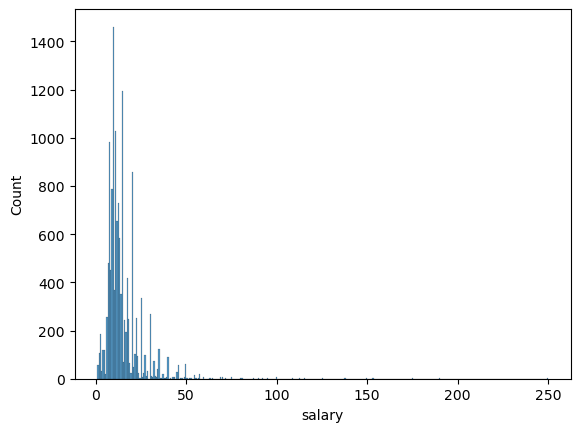

In [30]:
sns.histplot(x=df['salary']);

Nhìn vào biểu đồ, có thể nhận thấy mức lương tập chung chủ yếu từ 1 cho đến 30 triệu VNĐ. Mặc dù vẫn tồn tại những công việc với mức lương cao hơn 100tr/tháng, tuy nhiên con số là vô cùng nhỏ

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


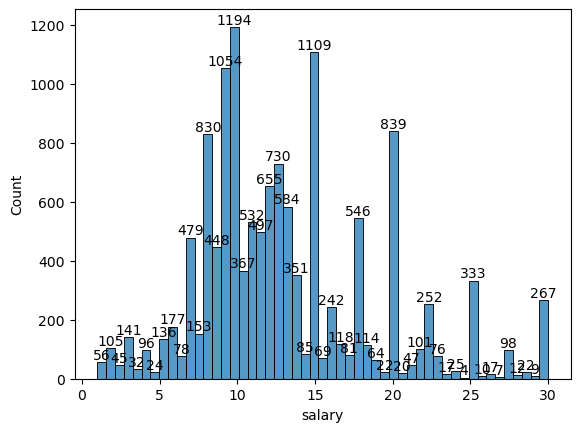

In [44]:
ax=sns.histplot(x=df[df['salary']<=30]['salary'])

for container in ax.containers:
    ax.bar_label(container);

Tập trung vào khoảng lương từ 1 đến 30 triệu.
* 10 triệu/tháng là mức lương phổ biến nhất: 1194 jobs
* Các vị trí tiếp theo lần lượt là: 15tr, 9tr, và 20tr một tháng

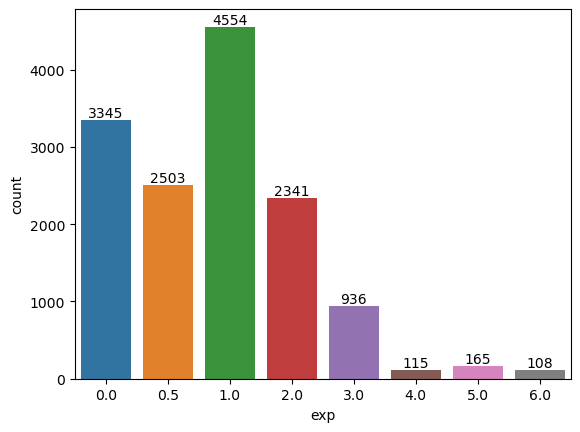

In [46]:
ax = sns.countplot(x=df['exp'])
ax.bar_label(ax.containers[0]);

Trên nền tảng tìm việc TopCV, số lượng job với yêu cầu 1 năm kinh nghiệm chiếm đa số, tiếp đến là những công việc mà không yêu cầu kinh nghiệm. Với tổng cộng lên tới 89% số lượng tin tuyển dụng tập trung vào nhóm đối tượng có từ 1 năm kinh nghiệm trở xuống. Trong khi đó, chỉ một số lượng rất nhỏ (388) công việc, chiếm khoảng 3% tổng số bài đăng tuyển dụng.
 
=> Có thể thấy TopCV là nền tảng tập trung chính tới nhóm đối tượng lao động chưa có nhiều kinh nghiệm (lao động tự do, sinh viên mới ra trường,...)

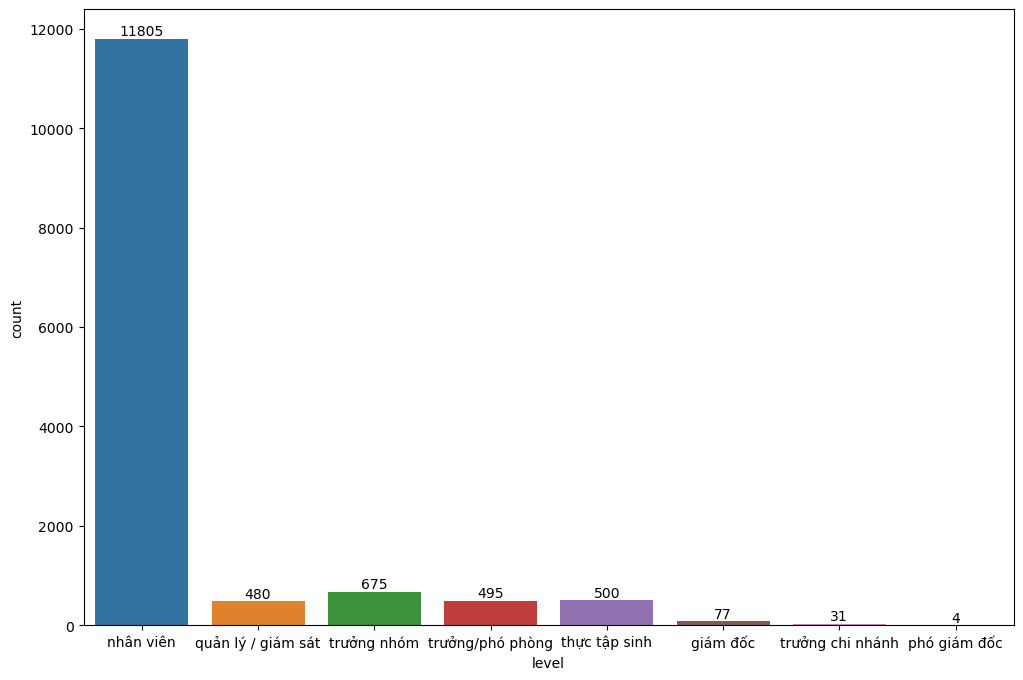

In [48]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=df['level'])
ax.bar_label(ax.containers[0]);

* Số lượng tin tuyển dụng cho vị trí nhân viên chiếm tới 85% (11805 vị trí) tổng số vị trí được tuyển dụng trên nền tảng TopCV. 
* Các vị trí Quản lý, Trưởng nhóm, Trưởng/Phó phòng hay Thực tập sinh có số lượng tuyển khá thấp, rơi vào khoảng 480 đến 700 vị trí cần tuyển. Trong khi đó những vị trí cao hơn, chẳng hạn như Giám đốc, Trưởng chi nhánh hay phó giám đốc, là vô cùng thấp, chỉ rơi vào mức dưới 100 vị trí. 

=> Kết hợp với thông tin dữ liệu về số năm kinh nghiệm ở trên, có thể thấy nền tảng TopCV tập trung chính vào nhóm đối tượng lao động trẻ, mới ra trường và còn khá ít kinh nghiệm. Khác với nền tảng YBox - nền tảng tập trung chính vào nhóm đối tượng undergraduate student. 

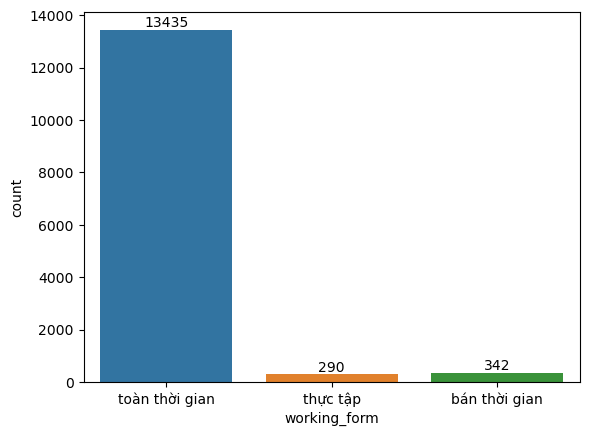

In [50]:
ax = sns.countplot(x=df['working_form'])
ax.bar_label(ax.containers[0]);

Có thể thấy đa phần các công ty tại Việt Nam yêu cầu nhân sự làm việc toàn thời gian với 13435 vị trí yêu cầu full-time (95%). Hai hình thức làm việc còn lại, thực tập và bán thời gian chỉ rơi vào khoảng 300 vị trí chấp nhận 2 hình thức làm việc này

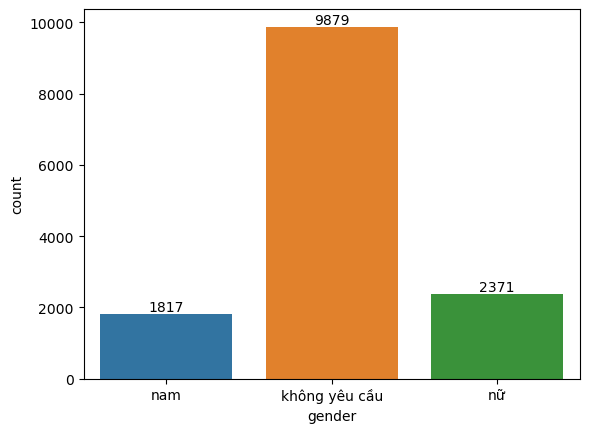

In [52]:
ax = sns.countplot(x=df['gender'])
ax.bar_label(ax.containers[0]);

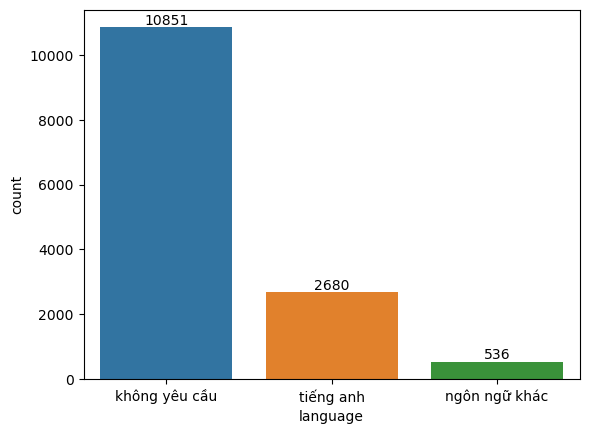

In [54]:
ax = sns.countplot(x=df['language'])
ax.bar_label(ax.containers[0]);

Các vị trí việc làm có yêu cầu về yếu tố ngoại ngữ và giới tính chỉ chiếm tỉ lệ tương đối thấp. Phần lớn các công việc trên nền tảng TopCV tại Việt Nam không có yêu cầu về khả năng sử dụng ngoại ngữ và giới tính phù hợp. 

Tuy nhiên, có thể thấy ở thị trường lao động Việt Nam, tiếng Anh vẫn là ngôn ngữ phổ biến nhất, với 2680 vị trí yêu cầu khả năng sử dụng tiếng Anh. Trong khi đó, trong số 3216 vị trí yêu cầu khả năng sử dụng ngoại ngữ, chỉ có khoảng 17% vị trí yêu cầu sử dụng các ngôn ngữ khác 

=> Khả năng sử dụng tiếng Anh là một lợi thế vô cùng lớn tại thị trường Việt Nam

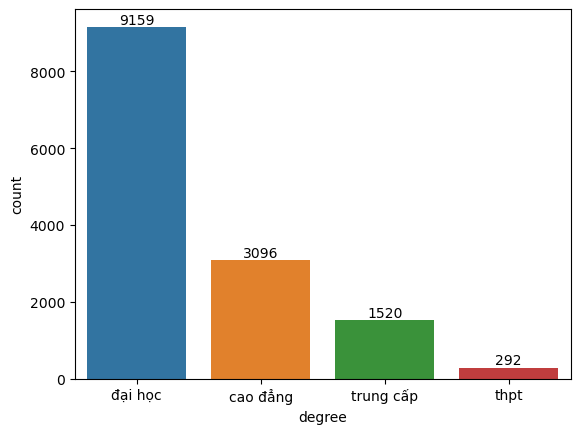

In [55]:
ax = sns.countplot(x=df['degree'])
ax.bar_label(ax.containers[0]);

Theo yêu cầu về bằng cấp, các công việc yêu cầu ứng viên có ít nhất bằng đại học chiếm đa số với 9.159 tin tuyển dụng (65%), tiếp theo là bằng cao đẳng với 3.096 tin tuyển dụng. Điều này cho thấy bằng cấp thực sự quan trọng khi tìm kiếm việc làm ở thị trường Việt Nam. Chỉ có rất ít công việc cho phép ứng viên sử dụng bằng trung cấp và bằng tốt nghiệp trung học.

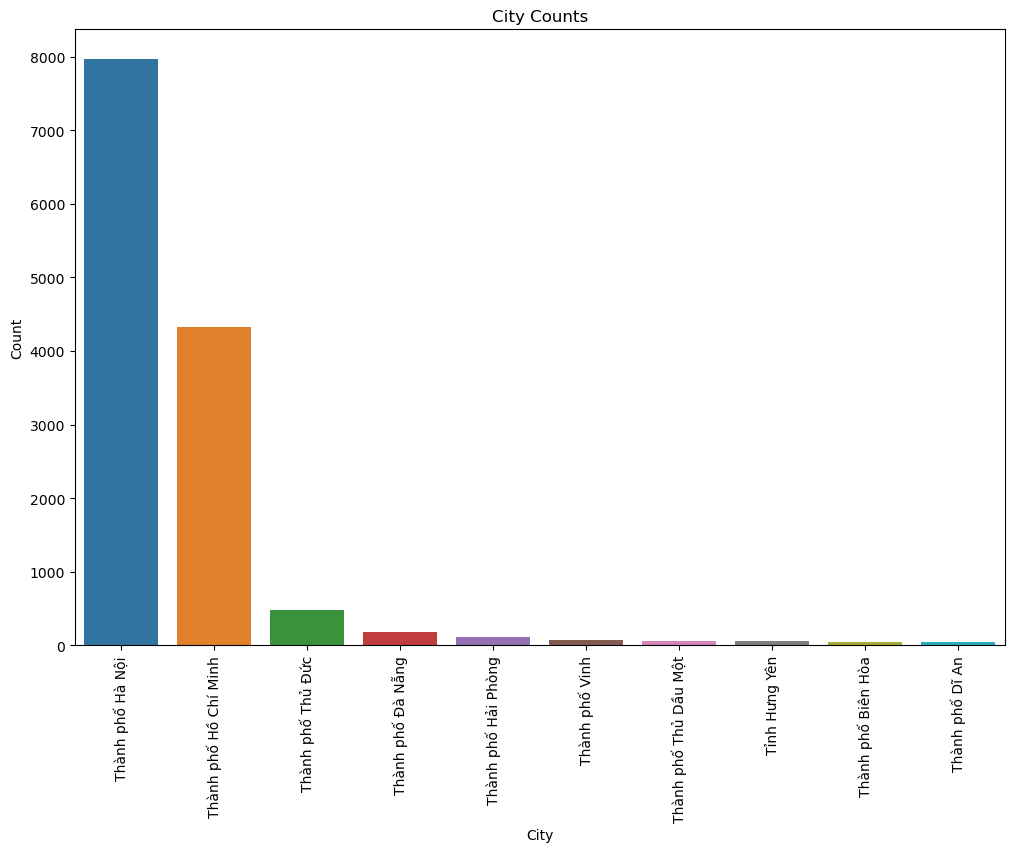

In [126]:
city_count = df['city'].value_counts()

city_count_df = city_count.reset_index()
city_count_df = city_count_df.head(10)
city_count_df.columns = ['City', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Count', data=city_count_df)
plt.xticks(rotation=90)
plt.title('City Counts')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

Có thể dễ dàng dự đoán được Hà Nội và TPHCM là 2 thành phố có số lượng công việc lớn nhất, và dữ liệu tuyển dụng từ TopCV cũng cho ta thấy điều tương tự. Số lượng công việc tại Hà Nội nhiều gần như gấp đôi tại TPHCM 
=> Nền tảng TopCV hoạt động hiệu quả hơn tại Hà Nội. Trong khi thị trường việc làm tại TPHCM lớn hơn Hà Nội => Thị trường miền Nam hoạt động ko hiệu quả bằng Hà Nội

### **Bivariate analysis**

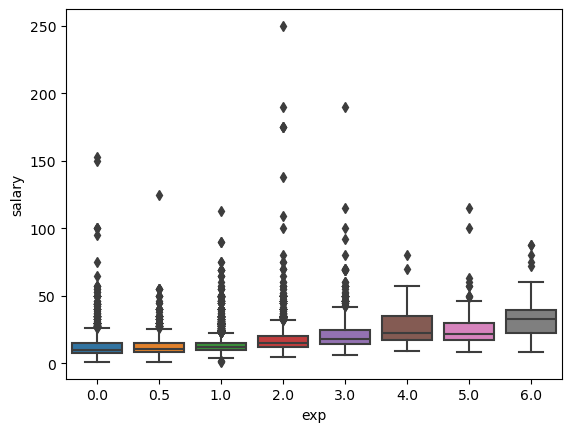

In [129]:
sns.boxplot(x=df['exp'],y=df['salary']);

Nhìn vào sơ đồ boxplot trên, có thể thấy sự tương quan nhất định giữa kinh nghiệm làm việc và mức lương, kinh nghiệm tăng cùng kéo theo khoảng lương trung bình tăng lên. Với những công việc không yêu cầu kinh nghiệm, mức lương dao động trong khoảng từ 7,5 đến 15 triệu. Khi có 1 năm kinh nghiệm, mức lương trung bình dao động từ 10 đến 16 triêu. Đối với những nhân viên có tới 6 năm kinh nghiệm, mức lương trung bình lên đến 32.5 triệu và dao động trong khoảng từ 22.5 đến 40 triệu

=> Có thể thấy kinh nghiệm có ảnh hưởng tới mức lương của người lao động

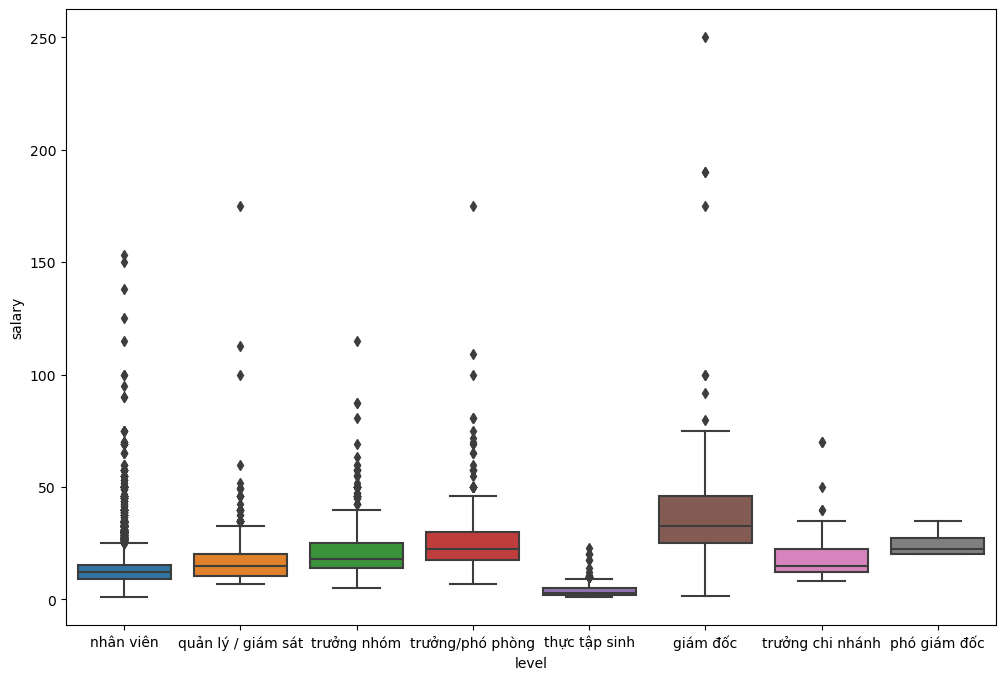

In [132]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x=df['level'],y=df['salary']);

Nhìn vào biểu đồ trên, chúng ta có thể thấy rằng thực tập sinh có mức lương trung bình thấp nhất, điều này cũng dễ hiểu trong thị trường lao động. Mức lương tăng lên với các công việc có cấp bậc cao hơn, và giám đốc là vị trí có mức lương trung bình cao nhất. Mức lương của giám đốc tập trung trong khoảng từ 24,5 đến 46 triệu, mức lương này khá tương đồng với mức lương của các công việc yêu cầu 6 năm kinh nghiệm. Nhân viên có mức lương trung bình thấp thứ hai, chỉ cao hơn thực tập sinh nhưng chứa nhiều giá trị ngoại lệ. Những giá trị ngoại lệ này có mức lương hơn 100 triệu/tháng, đây là mức lương rất cao cho một công việc tại Việt Nam hoặc cũng có thể là lỗi nhập liệu/lừa đảo. Tương tự với thực tập sinh, cũng có một số công việc với mức lương cao bất thường.

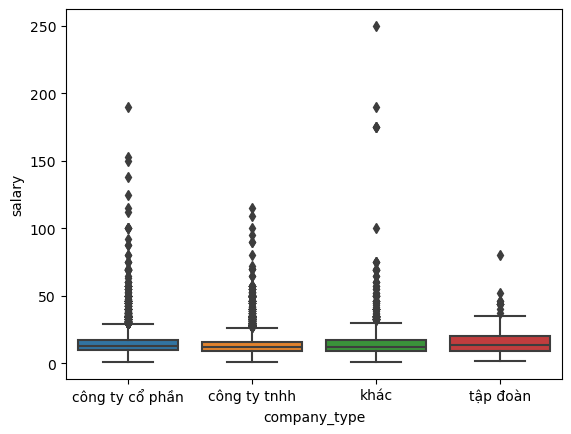

In [136]:
sns.boxplot(x=df['company_type'],y=df['salary']);

Nhìn vào biểu đồ trên, có thể thấy rằng gần như không có sự khác biệt giữa các loại công ty về mức lương trung bình, IQR và giá trị ngoại lệ. Có thể kết luận rằng loại hình công ty không ảnh hưởng đến mức lương.

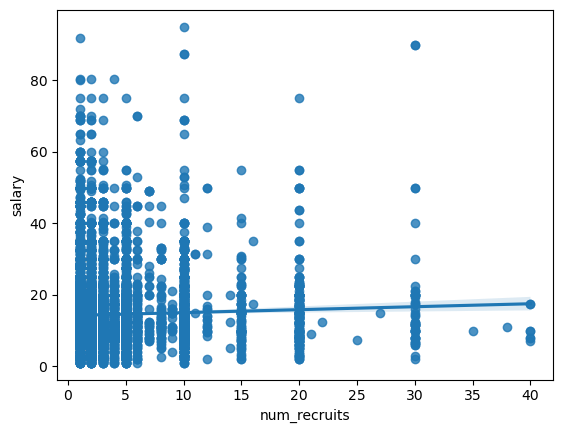

In [139]:
sns.regplot(x='num_recruits', y='salary', data=df[(df['salary']<100) & (df['num_recruits']<50)]);

Biểu đồ scatterplot thể hiện mối tương quan giữa số lượng tuyển dụng và mức lương. Đường hồi quy tuyến tính gần như song song với trục x, nghĩa là khi giá trị của biến số lượng tuyển dụng tăng, giá trị của biến lương hầu như không thay đổi. Điều này chứng tỏ rằng một bài đăng tuyển dụng có tuyển nhiều hay ít người không phản ánh mức lương.

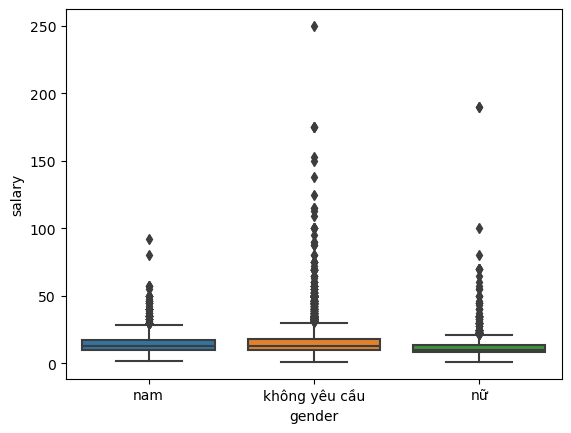

In [142]:
sns.boxplot(x=df['gender'], y=df['salary']);

Không có nhiều sự khác biệt về mức lương theo yêu cầu giới tính trong các tin tuyển dụng. Những công việc không yêu cầu giới tính có số lượng vị trí tuyển dụng lớn nhất và cũng có mức lương cao nhất, tập trung trong khoảng từ 10 đến 18 triệu. Mặc dù số lượng công việc yêu cầu giới tính nữ nhiều hơn so với nam, nhưng mức lương trung bình lại thấp hơn so với những công việc yêu cầu giới tính nam.

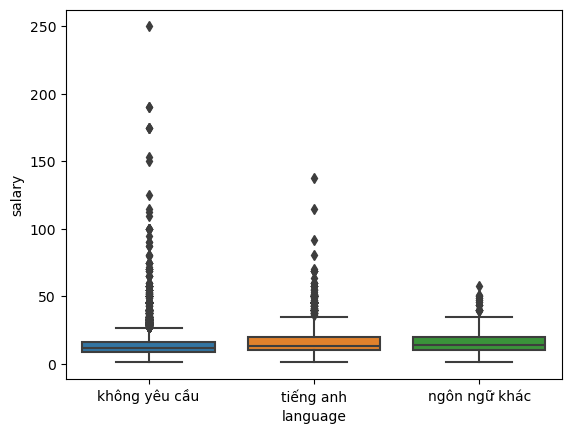

In [144]:
sns.boxplot(x=df['language'], y=df['salary']);

Những công việc không yêu cầu ngoại ngữ, mặc dù có số lượng tin tuyển dụng cao nhất, nhưng lại có mức lương trung bình thấp nhất. Những công việc yêu cầu tiếng Anh hoặc các ngoại ngữ khác có mức lương dao động từ 10 đến 20 triệu. Có thể thấy rằng những người học các ngoại ngữ khác ngoài tiếng Anh, mặc dù có ít công việc hơn, nhưng mức lương sẽ không thấp hơn so với những công việc yêu cầu tiếng Anh.

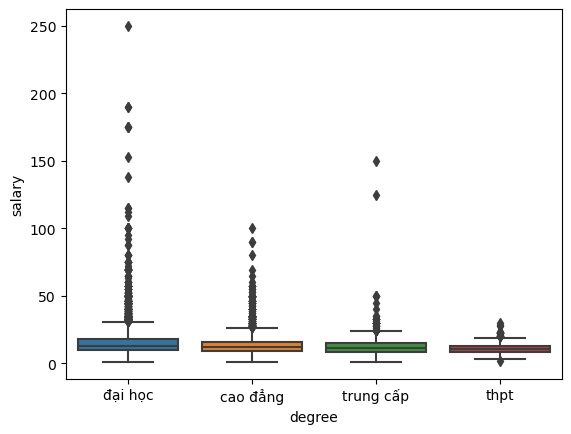

In [146]:
sns.boxplot(x=df['degree'], y=df['salary']);

Có thể thấy rằng những công việc yêu cầu bằng cấp cao hơn sẽ có mức lương trung bình cao hơn.

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14067 entries, 0 to 14066
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          14067 non-null  object 
 1   category_type     14067 non-null  object 
 2   job_address       14067 non-null  object 
 3   Longitude         14067 non-null  float64
 4   Latitude          14067 non-null  float64
 5   city              14066 non-null  object 
 6   district          12999 non-null  object 
 7   suburb            11883 non-null  object 
 8   job_id            14067 non-null  int64  
 9   job_name          14067 non-null  object 
 10  working_form      14067 non-null  object 
 11  level             14067 non-null  object 
 12  gender            14067 non-null  object 
 13  exp               14067 non-null  float64
 14  degree            14067 non-null  object 
 15  language          14067 non-null  object 
 16  BH                14067 non-null  int64 

### **ANOVA & Kendalltau**

In [158]:
cate_cols = ['category_type', 'level', 'exp', 'working_form', 'gender', 'language', 'degree', 'BH', 'company_type', 'num_other_job']

In [159]:
from sklearn.feature_selection import f_classif
ANOVA, p_value = zip(*[f_classif(df[['salary']], df[cols]) for cols in cate_cols])
ANOVA_values = [result[0] for result in ANOVA]
p_value_values = [result[0] for result in p_value]
df_ANOVA = pd.DataFrame({'feaute':cate_cols,"ANOVA":ANOVA_values, "p_value":p_value_values})

In [160]:
df_ANOVA.sort_values(by='ANOVA', ascending=False)

,feaute,ANOVA,p_value
0,category_type,455.352128,2.411267e-192
1,level,409.025116,0.000000e+00
2,exp,327.629366,0.000000e+00
3,working_form,280.440454,3.733917e-120
4,gender,108.675847,1.457705e-47
5,language,75.851659,1.715703e-33
6,degree,57.311238,8.146321e-37
7,BH,11.540339,6.829085e-04
8,company_type,11.266141,2.227318e-07
9,num_other_job,9.861483,7.007530e-11


In [161]:
from scipy.stats import kendalltau
res, p_value = zip(*[kendalltau(df[['salary']], df[cols]) for cols in cate_cols])
df_kendalltau = pd.DataFrame({'feaute':cate_cols,"kendalltau":res, "p_value":p_value})

In [162]:
df_kendalltau.sort_values(by='kendalltau', ascending=False)

,feaute,kendalltau,p_value
2,exp,0.310716,0.000000e+00
3,working_form,0.235293,2.729846e-249
5,language,0.095331,2.570774e-43
1,level,0.082457,8.427657e-34
7,BH,0.075219,8.131552e-27
0,category_type,0.067727,2.054641e-23
6,degree,0.060682,2.003012e-19
9,num_other_job,0.055640,2.654583e-19
8,company_type,-0.029184,1.369911e-05
4,gender,-0.119415,1.954407e-69


Kết quả cho thấy giá trị p_value của cả hai thuật toán đều nhỏ hơn mức ý nghĩa là 0.05 và rất gần với 0, vì vậy để xác định những thuộc tính thực sự ảnh hưởng đến biến lương, cần sử dụng giá trị ANOVA và kendalltau.

* Với ANOVA, giá trị ANOVA càng cao, biến đó được coi là ảnh hưởng nhiều đến biến mục tiêu. Các thuộc tính như category_type, level, exp, working_form và gender với chỉ số ANOVA cao nhất sẽ được coi là ảnh hưởng nhiều hơn đến lương. Các thuộc tính như insurance, company_type hoặc num_other_job có giá trị ANOVA thấp hơn so với các thuộc tính khác, vì vậy chúng sẽ được coi là không ảnh hưởng nhiều đến lương. Điều này tương tự như kết quả của phân tích đa biến ở trên.

* Đối với Kendalltau, giá trị kendalltau càng gần -1 và 1, nó sẽ có mối tương quan cao với biến lương, và giá trị càng gần 0, thì nó càng không liên quan đến biến lương. Các biến có ảnh hưởng cao là exp, working_form, gender, language và level và các biến company_type, num_other_job, degree, category_type có ảnh hưởng thấp hơn.

Do đó, các thuộc tính như exp, working_form, level là các thuộc tính quan trọng nhất vì chúng luôn có các chỉ số ANOVA và kendalltau cao hơn. Các thuộc tính company_type và num_other_job có thể được coi là hai thuộc tính dư thừa vì chúng luôn có chỉ số ANOVA và Kendalltau thấp. Hai thuộc tính này có thể được loại bỏ nếu sử dụng bộ dữ liệu này cho các mô hình hồi quy/phân loại.